<a href="https://colab.research.google.com/github/Kushl143/feynee-labes3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_excel("/content/Ev Sales.xlsx", index_col=0)

# Convert index to datetime for time-based analysis
df.index = pd.to_datetime(df.index, errors='coerce')

# Drop any rows with missing dates
df = df.dropna()

# Fill missing values with 0 (if any)
df = df.fillna(0)

# Rename columns for clarity
df.columns = ['2W', '3W', '4W', 'Bus', 'Total Sales']

# Convert index to cleaner format
df.index = df.index.strftime('%Y-%m')

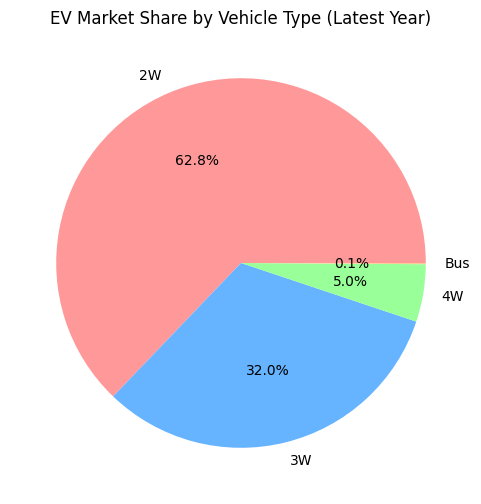

In [ ]:
# =========================
# MARKET SEGMENTATION ANALYSIS
# =========================
# Group by Year for annual trends
yearly_sales = df.groupby(df.index.str[:4]).sum()

# Pie chart for market share
plt.figure(figsize=(6,6))
plt.pie(yearly_sales.iloc[-1, :-1], labels=yearly_sales.columns[:-1], autopct='%1.1f%%', colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("EV Market Share by Vehicle Type (Latest Year)")
plt.savefig("ev_market_share.png")
plt.show()

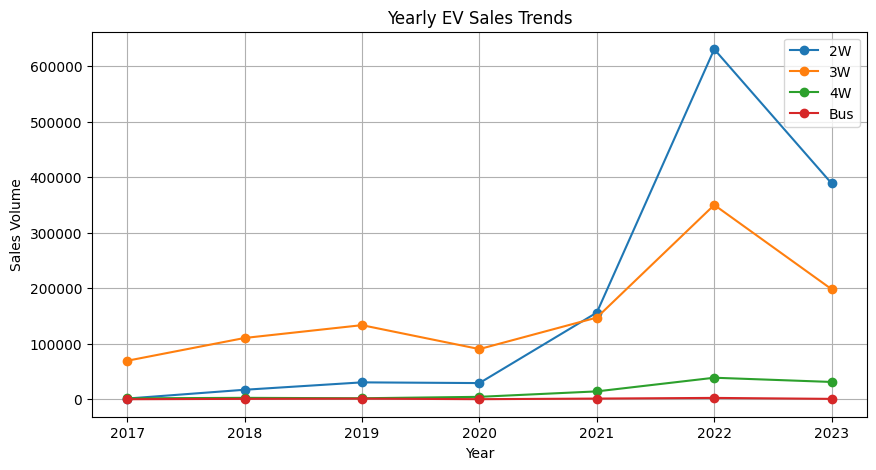

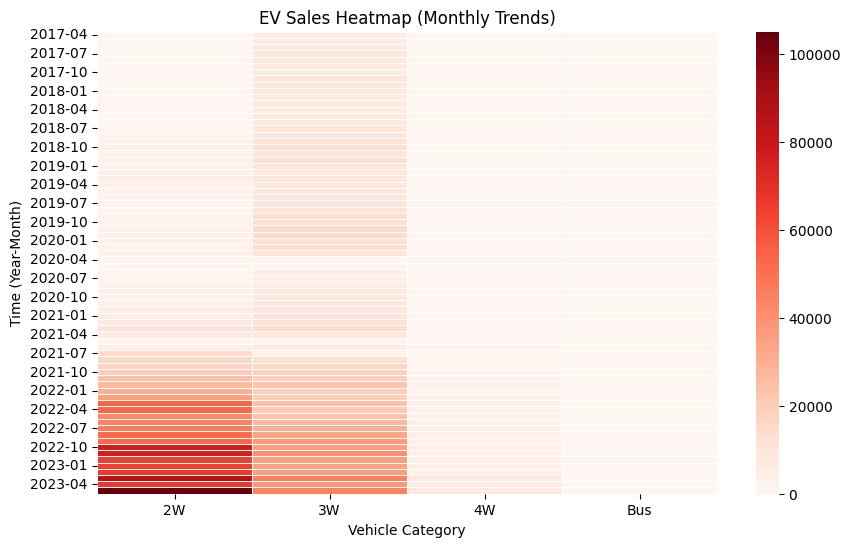

In [ ]:
# =========================
# VISUALIZATION
# =========================
# Line plot for yearly sales trends
plt.figure(figsize=(10, 5))
for col in yearly_sales.columns[:-1]:
    plt.plot(yearly_sales.index, yearly_sales[col], marker='o', label=col)
plt.title("Yearly EV Sales Trends")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid()
plt.savefig("ev_sales_trends.png")
plt.show()

# Heatmap for monthly trends
plt.figure(figsize=(10, 6))
sns.heatmap(df[['2W', '3W', '4W', 'Bus']], cmap="Reds", annot=False, linewidths=0.5)
plt.title("EV Sales Heatmap (Monthly Trends)")
plt.xlabel("Vehicle Category")
plt.ylabel("Time (Year-Month)")
plt.savefig("ev_sales_heatmap.png")
plt.show()